# Respuesta a una entrada en escalón

La salida de un sistema de segundo orden a una entrada de tipo escalón
es:

$$y (s) = \frac{K_p}{\tau^2 s^2 + 2 \zeta \tau s + 1}  \frac{M}{s}$$

Para poder descomponer la respuesta en fracciones simples y poder
obtener la respuesta en tiempo real hay que hallar las raíces del
denominador:

$$s_1, s_2 = \frac{- \zeta \pm \sqrt[]{\zeta^2 - 1}}{\tau}$$

En función del valor del coeficiente de amortiguamiento se pueden
plantear tres casos.

In [1]:
using SymPy, Plots, LaTeXStrings

t, Kp, M = symbols("t K_p M", real=true)
τ, ζ = symbols("tau zeta", positive=true)
s = symbols("s")

iL(f) = sympy.inverse_laplace_transform(f, s, t)

G = Kp/(τ^2*s^2+2*ζ*τ*s+1)
f = M/s

y = G*f

solve(denominator(y),s)

3-element Vector{Sym}:
                              0
 (-zeta + sqrt(zeta^2 - 1))/tau
 -(zeta + sqrt(zeta^2 - 1))/tau

## Respuesta sobreamortiguada

Es la respuesta obtenida cuando $\zeta > 1$, las dos soluciones son
reales. La salida con el tiempo es:

$$\frac{y (t)}{K_p M} = 1 - \mathrm{e}^{- \zeta \frac{t}{\tau}}  \left( \cosh
   \left( \sqrt[]{\zeta^2 - a}  \frac{t}{\tau} \right) +
   \frac{\zeta}{\sqrt[]{\zeta^2 - 1}} \sinh \left( \sqrt[]{\zeta^2 - 1} 
   \frac{t}{\tau} \right) \right)$$

En este caso la respuesta no presenta oscilaciones. Cuanto mayor es el
coeficiente de amortiguamiento más amortiguada es la respuesta, el
sistema necesita más tiempo para alcanzar el nuevo estado estacionario.
La ganancia $K_p$ tiene el mismo sentido físico que para los sistemas de
primer orden.

## Respuesta críticamente amortiguada

Cuando solo hay una solución real (repetida), $\zeta = 1$:

$$\frac{y (t)}{K_p M} = 1 - \left( 1 + \frac{t}{\tau} \right) \mathrm{e}^{-
   \frac{t}{\tau}}$$

## Respuesta subamortiguada

Se obtiene cuando las soluciones son complejas (conjugadas, obviamente),
para que eso se produzca $\zeta < 1$. La función respuesta obtenida es:

$$\frac{y (t)}{K_p M} = 1 - \frac{1}{\sqrt[]{1 - \zeta^2}} \mathrm{e}^{- \zeta
   \frac{t}{\tau}} \sin \left( \sqrt[]{1 - \zeta^2}  \frac{t}{\tau} +
   \operatorname{atan} \frac{\sqrt[]{1 - \zeta^2}}{\zeta} \right)$$

```{figure} ./img/0.png
---
figclass: margin
align: left
---
Respuesta de diferentes sistemas de segundo orden a un escalón unidad según su coeficiente de amortiguamiento.
```

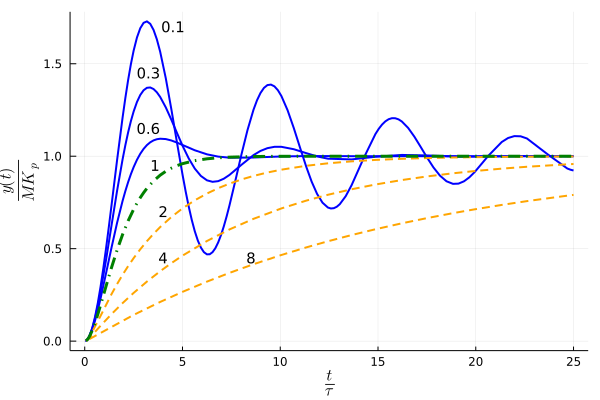

In [2]:
zz = [.1, .3, .6, 2, 3.99, 8]
yy = [iL(G(Kp=>1, τ=>1, ζ=>z)*f(M=>1)) for z in zz]
push!(yy, iL(G(Kp=>1, τ=>1, ζ=>1)*f(M=>1)))
plot(yy[1](t), 0, 25, lw=2, color="blue",
    xlabel=L"\frac{t}{\tau}",
    ylabel=L"\frac{y(t)}{M K_p}",
    legend=false)
plot!(yy[2](t), 0, 25, lw=2, color="blue")
plot!(yy[3](t), 0, 25, lw=2, color="blue")
plot!(yy[4](t), 0, 25, lw=2, color="orange", linestyle=:dash)
plot!(yy[5](t), 0, 25, lw=2, color="orange", linestyle=:dash)
plot!(yy[6](t), 0, 25, lw=2, color="orange", linestyle=:dash)
plot!(yy[7](t), 0, 25, lw=3, color="green", linestyle=:dashdot)
annotate!(4.5, 1.7, Plots.text("0.1", 10))
annotate!(3.25, 1.45, Plots.text("0.3", 10))
annotate!(3.25, 1.15, Plots.text("0.6", 10))
annotate!(3.6, 0.95, Plots.text("1", 10))
annotate!(4, 0.7, Plots.text("2", 10))
annotate!(4, 0.45, Plots.text("4", 10))
annotate!(8.5, 0.45, Plots.text("8", 10))

La respuesta es oscilatoria y se pueden definir los siguientes
parámetros característicos:

-   **Overshoot** (disparo):

    $$\text{Overshoot} = \frac{A}{B} = \exp \left( \frac{- \pi
         \zeta}{\sqrt[]{1 - \zeta^2}} \right)$$
         
    El *overshoot* aumenta
    al disminuir el coeficiente de amortiguamiento. Para el caso límite
    de que el coeficiente de amortiguamiento tienda a 1, el *overshoot*
    también tiende a 1.

-   **Razón de disminución** (*decay ratio*):

    $$\text{Razón de disminución} = \frac{C}{A} = \exp \left( \frac{- 2
         \pi \zeta}{\sqrt[]{1 - \zeta^2}} \right) = \text{ overshoot}^2$$

-   **Período de oscilación**:

    $$T = \frac{1}{\nu} = \frac{2 \pi}{\omega} = \frac{2 \pi \tau}{\sqrt[]{1 -
         \zeta^2}}$$
         
    Si $\zeta = 0$, $T = 2 \pi \tau$ es el período
    natural de oscilación.

-   **Tiempo de respuesta** (*response time*): Un sistema subamortiguado
    alcanza su valor estacionario de manera oscilatoria cuando el tiempo
    se hace infinito. A efectos prácticos se toma como tiempo de
    respuesta el necesario para que la salida del sistema esté dentro
    del $\pm 5\%$ de la respuesta estacionaria y permanezca en ese
    intervalo.

-   ***Rise time***: De esta manera se caracteriza la velocidad con la que
    responde el sistema subamortiguado. Se define como el tiempo que
    tarda el sistema en alcanzar su valor estacionario por primera vez.
    Es importante resaltar que cuanto menor es el coeficiente de
    amortiguamiento, menor es el *rise time* pero mayor es el
    *overshoot*.

```{figure} ./img/figura2.svg
---
figclass: margin-caption
---
Representación gráfica de los parámetros que caracterizan la respuesta de un sistema de segundo orden subamortiguado.
```